# Add 100% of outliers

In [1]:
import sys
import os 
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

import outliers_utils
import pandas as pd
import ML_algorithms
from sklearn.metrics import classification_report

# Return to previous directory
os.chdir('..')

df = pd.read_csv('dataset/stroke_data.csv')

no_stroke_group = df[df['stroke'] == 0]
stroke_group = df[df['stroke'] == 1]

group_size = 5000

sampled_no_stroke_group = no_stroke_group.sample(n=group_size, random_state=42)
sampled_stroke_group = stroke_group.sample(n=group_size, random_state=42)

df = pd.concat([sampled_no_stroke_group,sampled_stroke_group])
df_original = df.copy()
df_original.dropna(axis=0,inplace=True)
df_original = df_original[df_original['age'] >= 0]


df.dropna(axis=0, inplace=True)
df = df[df['age'] >= 0]

outliers_utils.drop_negative_age(df)

## age

In [2]:
df = df_original.copy()

In [3]:
outliers_utils.visualize_outliers_specific(df, 'age')

no outliers detected


In [4]:
df_a = outliers_utils.outliers_replace(df, 'age', 100)

In [5]:
outliers_utils.visualize_outliers_specific(df_a, 'age')

no outliers detected


**Decision Tree**

Classification Report on Training Set:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99      3501
           1       0.97      1.00      0.99      3487

    accuracy                           0.99      6988
   macro avg       0.99      0.99      0.99      6988
weighted avg       0.99      0.99      0.99      6988

Classification Report on Test Set - dirty:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97      1498
           1       0.94      1.00      0.97      1498

    accuracy                           0.97      2996
   macro avg       0.97      0.97      0.97      2996
weighted avg       0.97      0.97      0.97      2996

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      4999
           1       0.96      1.00      0.98      4985

    accuracy                           0.98      9984


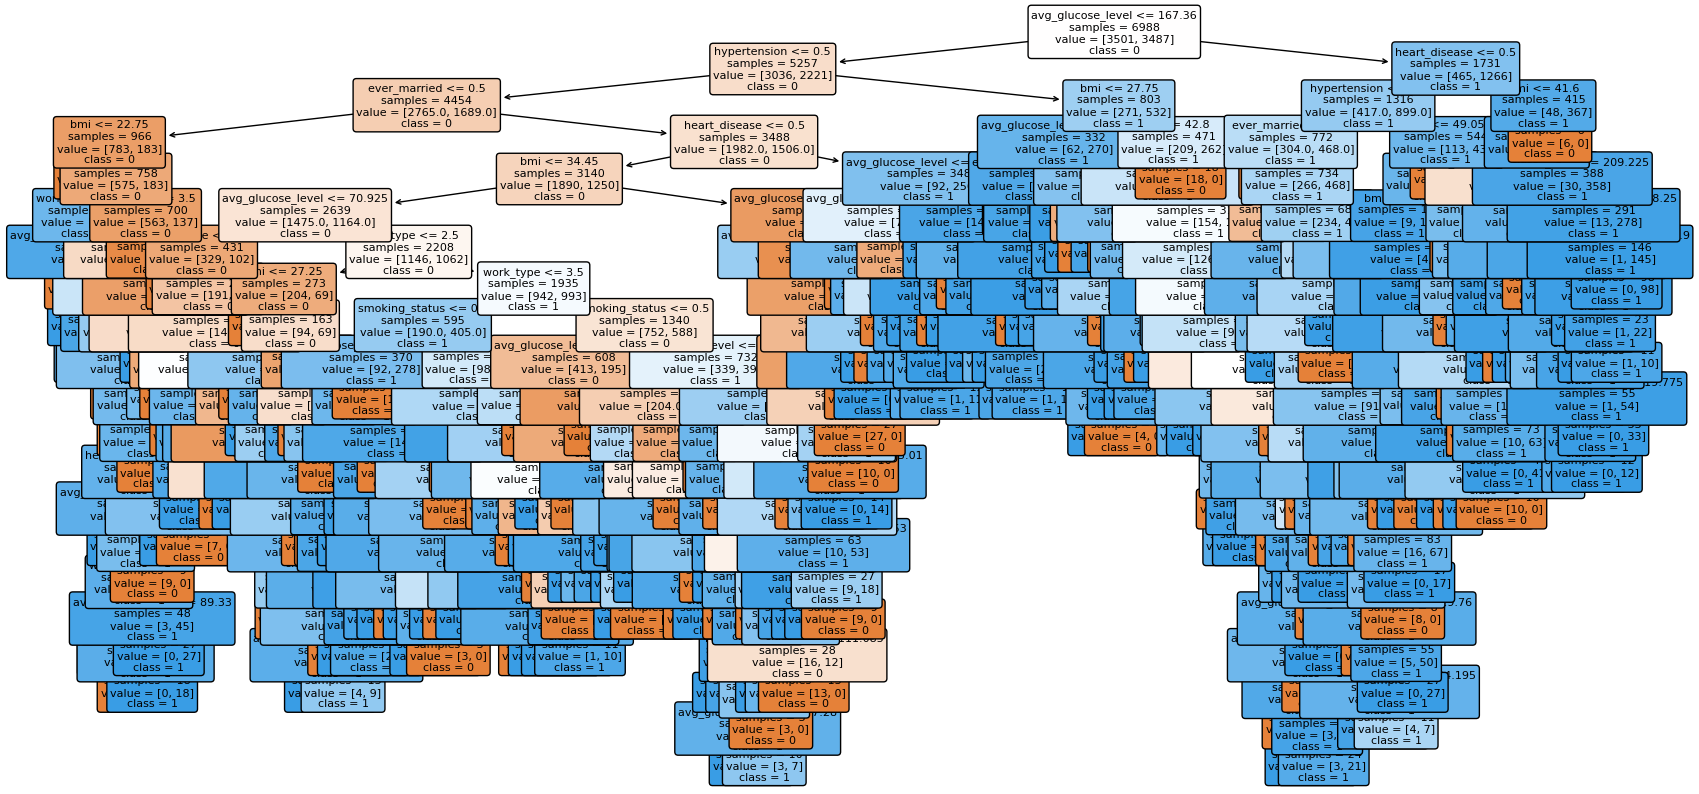

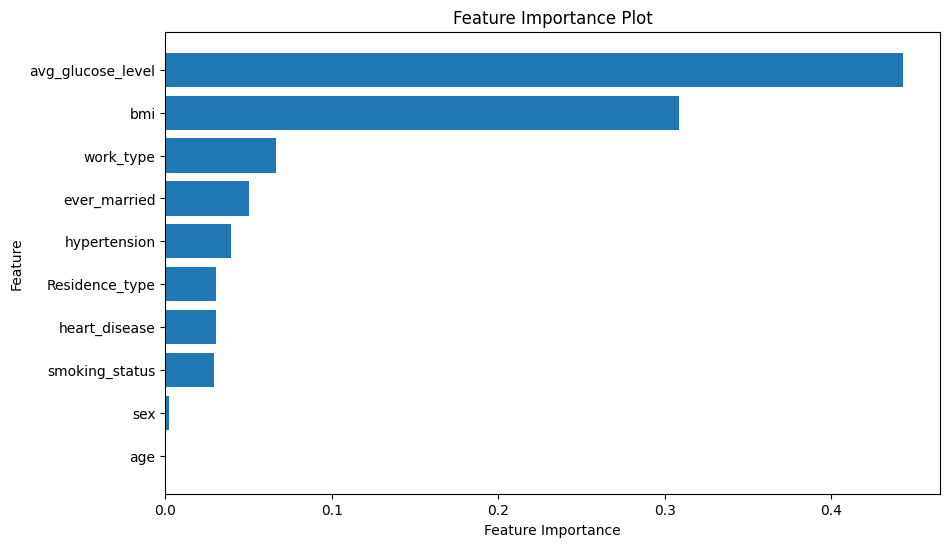

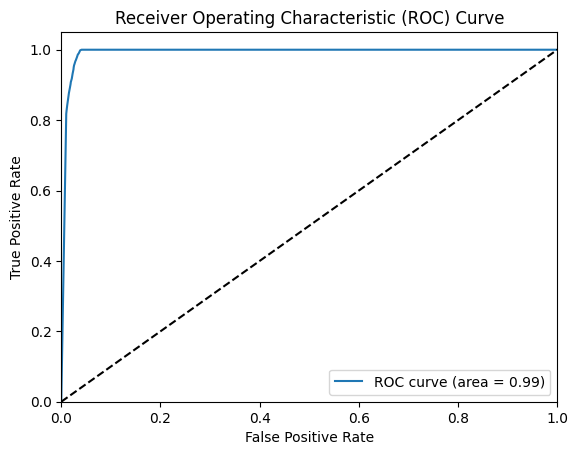

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


AUC Score: 0.9921350970294359
Accuracy for each fold: [0.9585121602288984, 0.9613733905579399, 0.9527896995708155, 0.9585121602288984, 0.9656652360515021, 0.9542203147353362, 0.9728183118741058, 0.9613733905579399, 0.9713467048710601, 0.9656160458452722]
Mean accuracy: 0.9622227414521767
95% confidence interval: (0.9574484592678443, 0.9669970236365091)


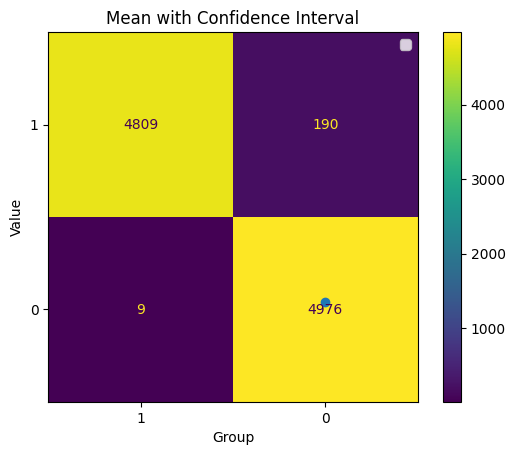

In [6]:
decision_tree = ML_algorithms.train_decision_tree_model(df_a, df_original)
ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_a)

**Hist Gradient Boosting Classifier**

Fitting 5 folds for each of 50 candidates, totalling 250 fits
search time: 46.36533737182617
Best parameters found:  {'l2_regularization': 0.1, 'learning_rate': 0.2, 'max_depth': 5, 'max_iter': 435, 'min_samples_leaf': 17}
Best score on training data:  1.0
Classification Report on Training Set - dirty:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3501
           1       1.00      1.00      1.00      3487

    accuracy                           1.00      6988
   macro avg       1.00      1.00      1.00      6988
weighted avg       1.00      1.00      1.00      6988

Classification Report on Test Set - dirty:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1498
           1       0.99      1.00      0.99      1498

    accuracy                           0.99      2996
   macro avg       0.99      0.99      0.99      2996
weighted avg       0.99      0.99      0.99      2996


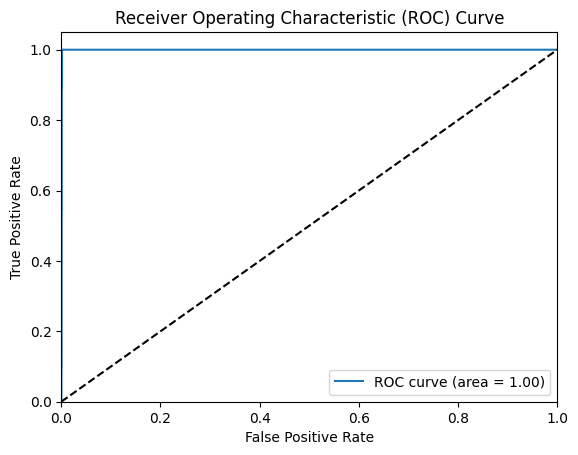

AUC Score: 0.9991688608534145


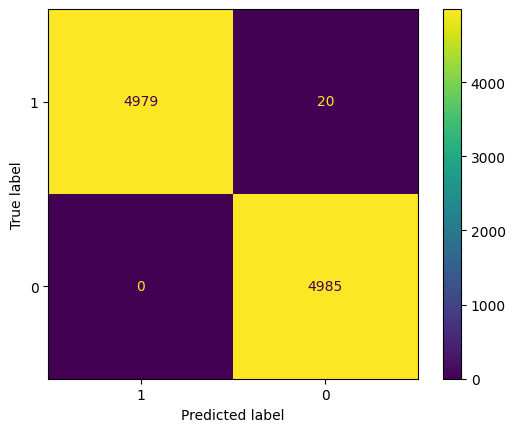

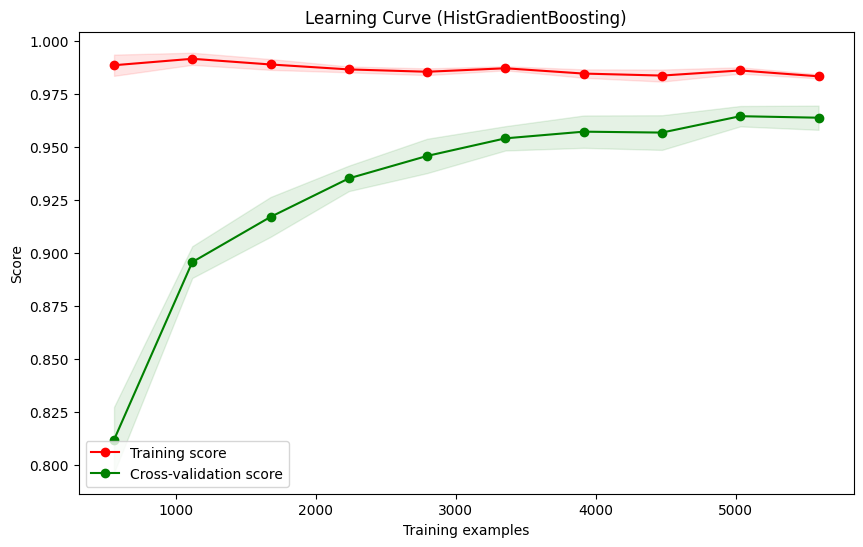

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.994277539341917, 0.9914163090128756, 0.9842632331902719, 0.9957081545064378, 0.9856938483547926, 0.9914163090128756, 0.9856938483547926, 0.9899856938483548, 0.995702005730659, 0.9842406876790831]
Mean accuracy: 0.989839762903206
95% confidence interval: (0.9865502046849438, 0.9931293211214681)


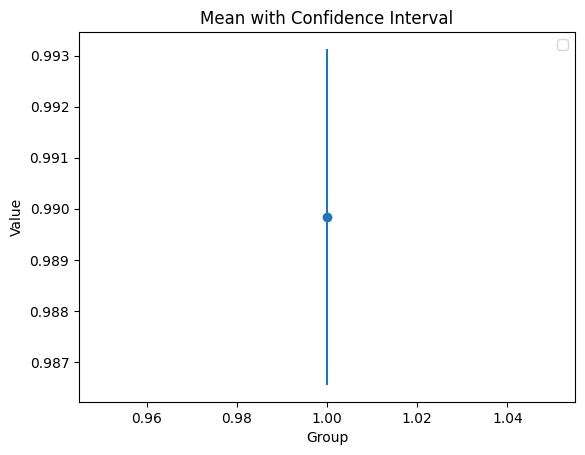

--------------------------------------


In [7]:
hgb = ML_algorithms.train_hist_gradient_boosting_model(df_a, df_original)
ML_algorithms.k_fold_cross_validation_dt(hgb,df_a)

print('--------------------------------------')

## avg_glucose_level

In [8]:
df = df_original.copy()

In [9]:
outliers_utils.visualize_outliers_specific(df, 'avg_glucose_level')

no outliers detected


In [10]:
df_g = outliers_utils.outliers_replace(df, 'avg_glucose_level', 100)

In [11]:
outliers_utils.visualize_outliers_specific(df_g, 'avg_glucose_level')

no outliers detected


**Decision Tree**

Classification Report on Training Set:
              precision    recall  f1-score   support

           0       0.95      0.90      0.93      3505
           1       0.91      0.96      0.93      3483

    accuracy                           0.93      6988
   macro avg       0.93      0.93      0.93      6988
weighted avg       0.93      0.93      0.93      6988

Classification Report on Test Set - dirty:
              precision    recall  f1-score   support

           0       0.91      0.84      0.87      1494
           1       0.85      0.91      0.88      1502

    accuracy                           0.88      2996
   macro avg       0.88      0.88      0.88      2996
weighted avg       0.88      0.88      0.88      2996

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.94      0.88      0.91      4999
           1       0.89      0.94      0.92      4985

    accuracy                           0.91      9984


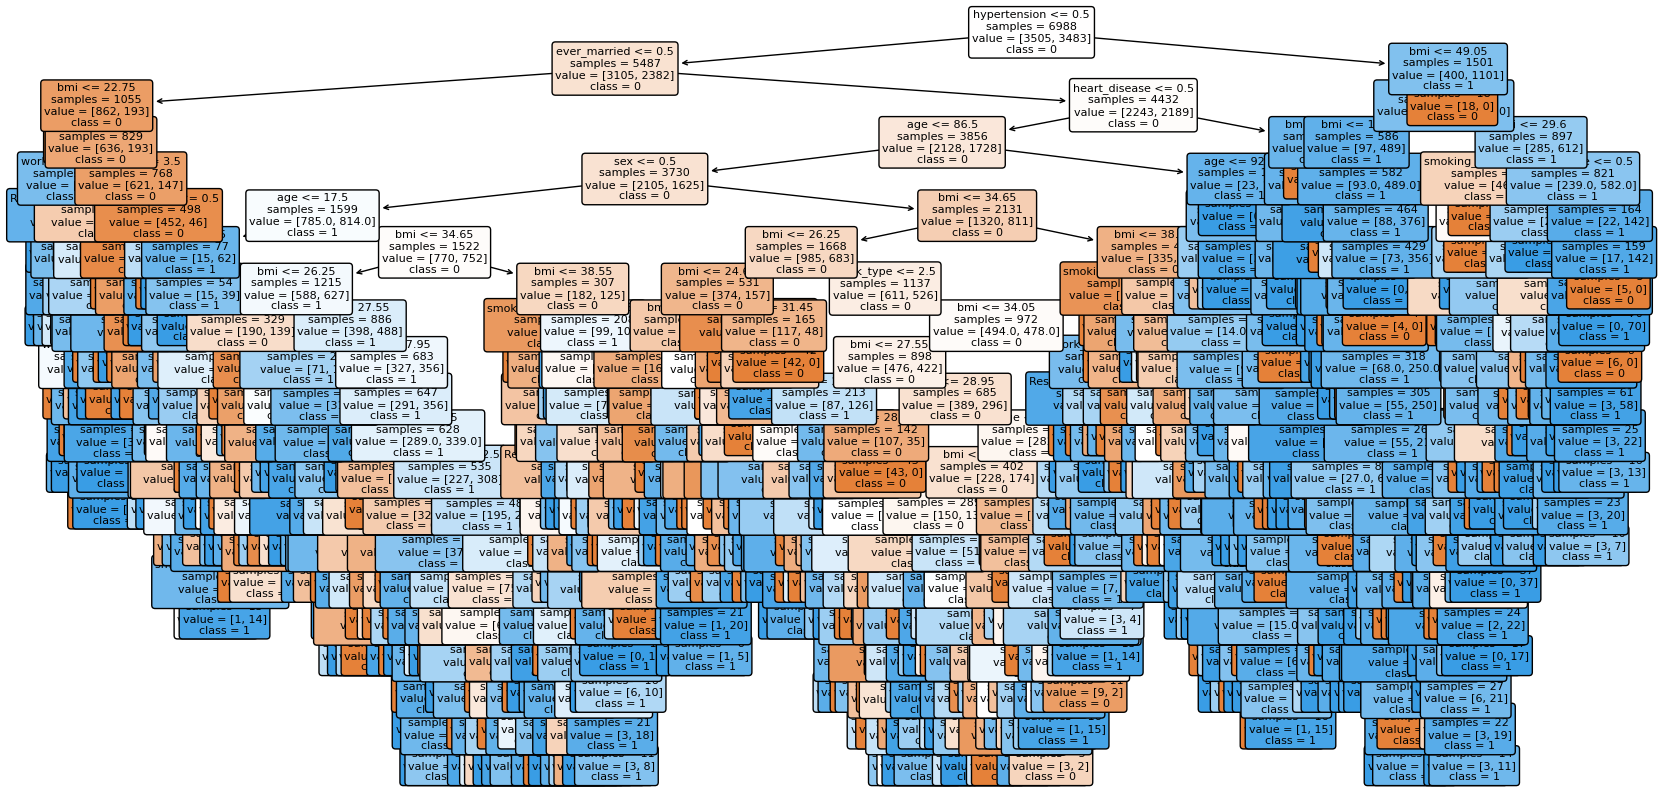

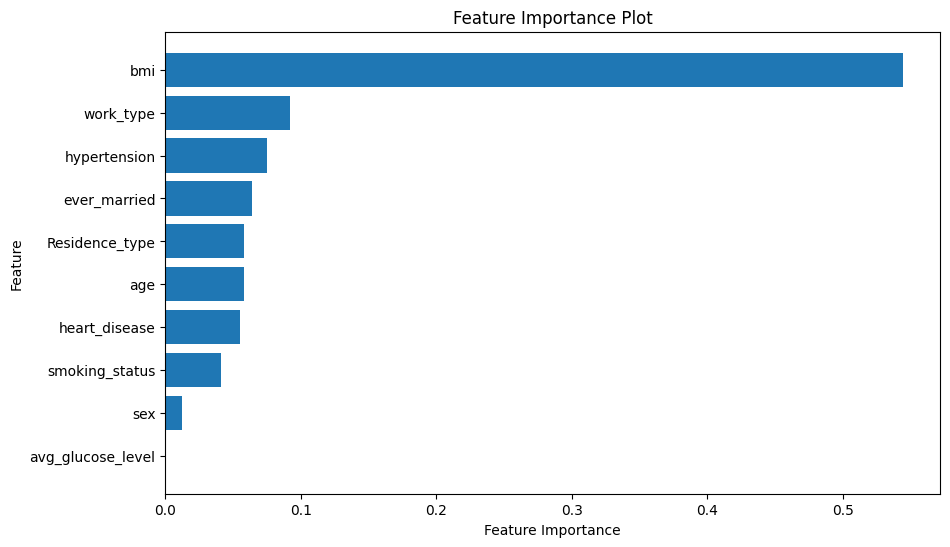

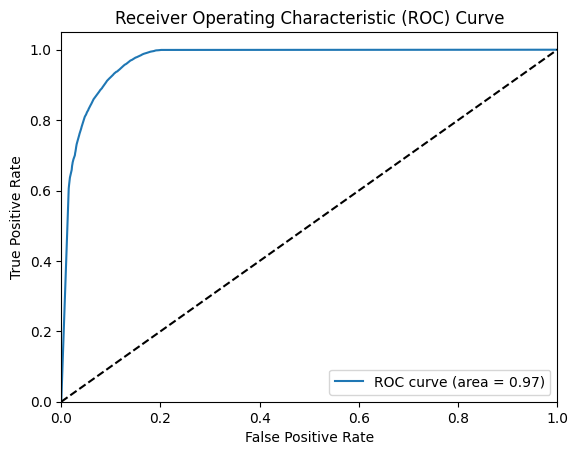

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


AUC Score: 0.9708176138738278
Accuracy for each fold: [0.8555078683834049, 0.8497854077253219, 0.8798283261802575, 0.8526466380543634, 0.8698140200286123, 0.8497854077253219, 0.8483547925608012, 0.8655221745350501, 0.830945558739255, 0.8753581661891118]
Mean accuracy: 0.8577548360121499
95% confidence interval: (0.8471762147825046, 0.8683334572417951)


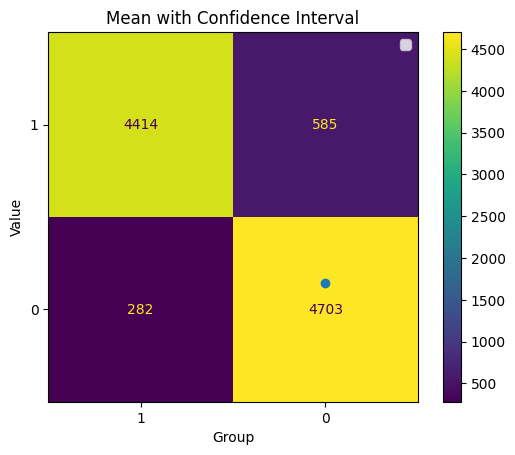

In [12]:
decision_tree = ML_algorithms.train_decision_tree_model(df_g, df_original)
ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_g)

**Hist Gradient Boosting Classifier**

Fitting 5 folds for each of 50 candidates, totalling 250 fits
search time: 42.42578125
Best parameters found:  {'l2_regularization': 0.1, 'learning_rate': 0.3, 'max_depth': 4, 'max_iter': 381, 'min_samples_leaf': 1}
Best score on training data:  0.9747340820264186
Classification Report on Training Set - dirty:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      3505
           1       0.96      1.00      0.98      3483

    accuracy                           0.98      6988
   macro avg       0.98      0.98      0.98      6988
weighted avg       0.98      0.98      0.98      6988

Classification Report on Test Set - dirty:
              precision    recall  f1-score   support

           0       0.98      0.89      0.93      1494
           1       0.90      0.98      0.94      1502

    accuracy                           0.94      2996
   macro avg       0.94      0.94      0.94      2996
weighted avg       0.94      0.94      0.94   

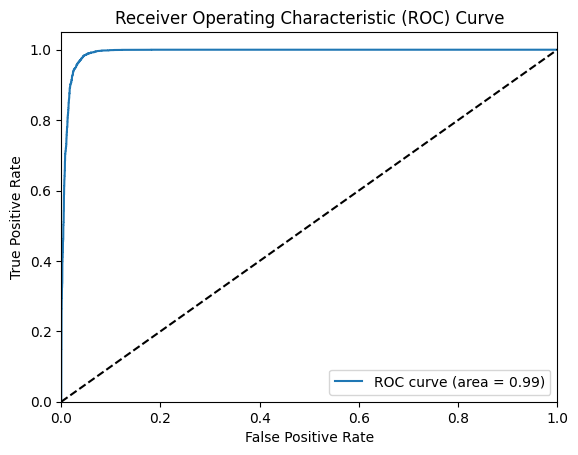

AUC Score: 0.9921485199748074


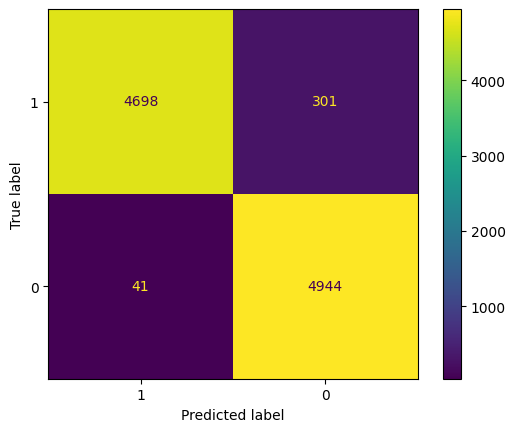

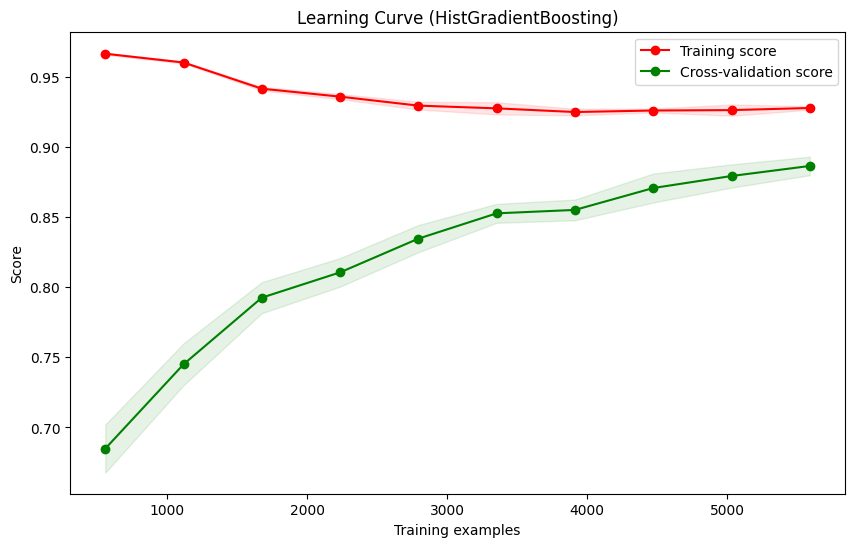

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.9298998569384835, 0.927038626609442, 0.932761087267525, 0.927038626609442, 0.9313304721030042, 0.9227467811158798, 0.9542203147353362, 0.9241773962804005, 0.9412607449856734, 0.9441260744985673]
Mean accuracy: 0.9334599981143755
95% confidence interval: (0.9262797986505872, 0.9406401975781639)


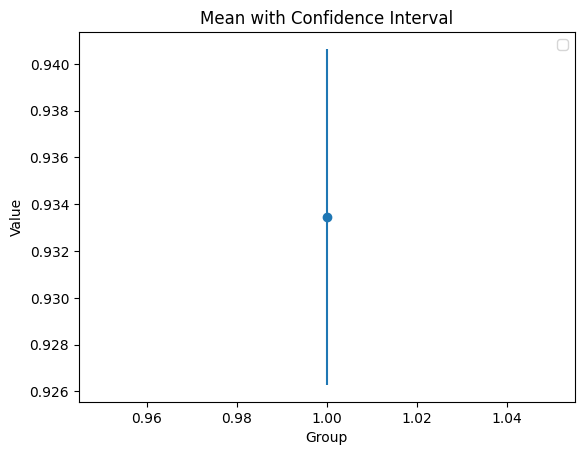

--------------------------------------


In [13]:
hgb = ML_algorithms.train_hist_gradient_boosting_model(df_g, df_original)
ML_algorithms.k_fold_cross_validation_dt(hgb,df_g)

print('--------------------------------------')

## bmi

In [14]:
df = df_original.copy()

Outliers found:


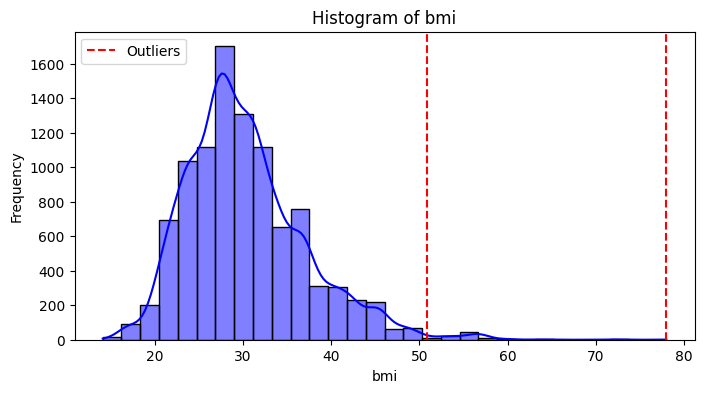

In [15]:
outliers_utils.visualize_outliers_specific(df, 'bmi')

In [16]:
df_b = outliers_utils.outliers_replace(df, 'bmi', 100)

In [17]:
outliers_utils.visualize_outliers_specific(df_b, 'bmi')

no outliers detected


**Decision Tree**

Classification Report on Training Set:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      3528
           1       0.97      0.99      0.98      3460

    accuracy                           0.98      6988
   macro avg       0.98      0.98      0.98      6988
weighted avg       0.98      0.98      0.98      6988

Classification Report on Test Set - dirty:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95      1471
           1       0.93      0.98      0.96      1525

    accuracy                           0.95      2996
   macro avg       0.96      0.95      0.95      2996
weighted avg       0.96      0.95      0.95      2996

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      4999
           1       0.96      0.99      0.97      4985

    accuracy                           0.97      9984


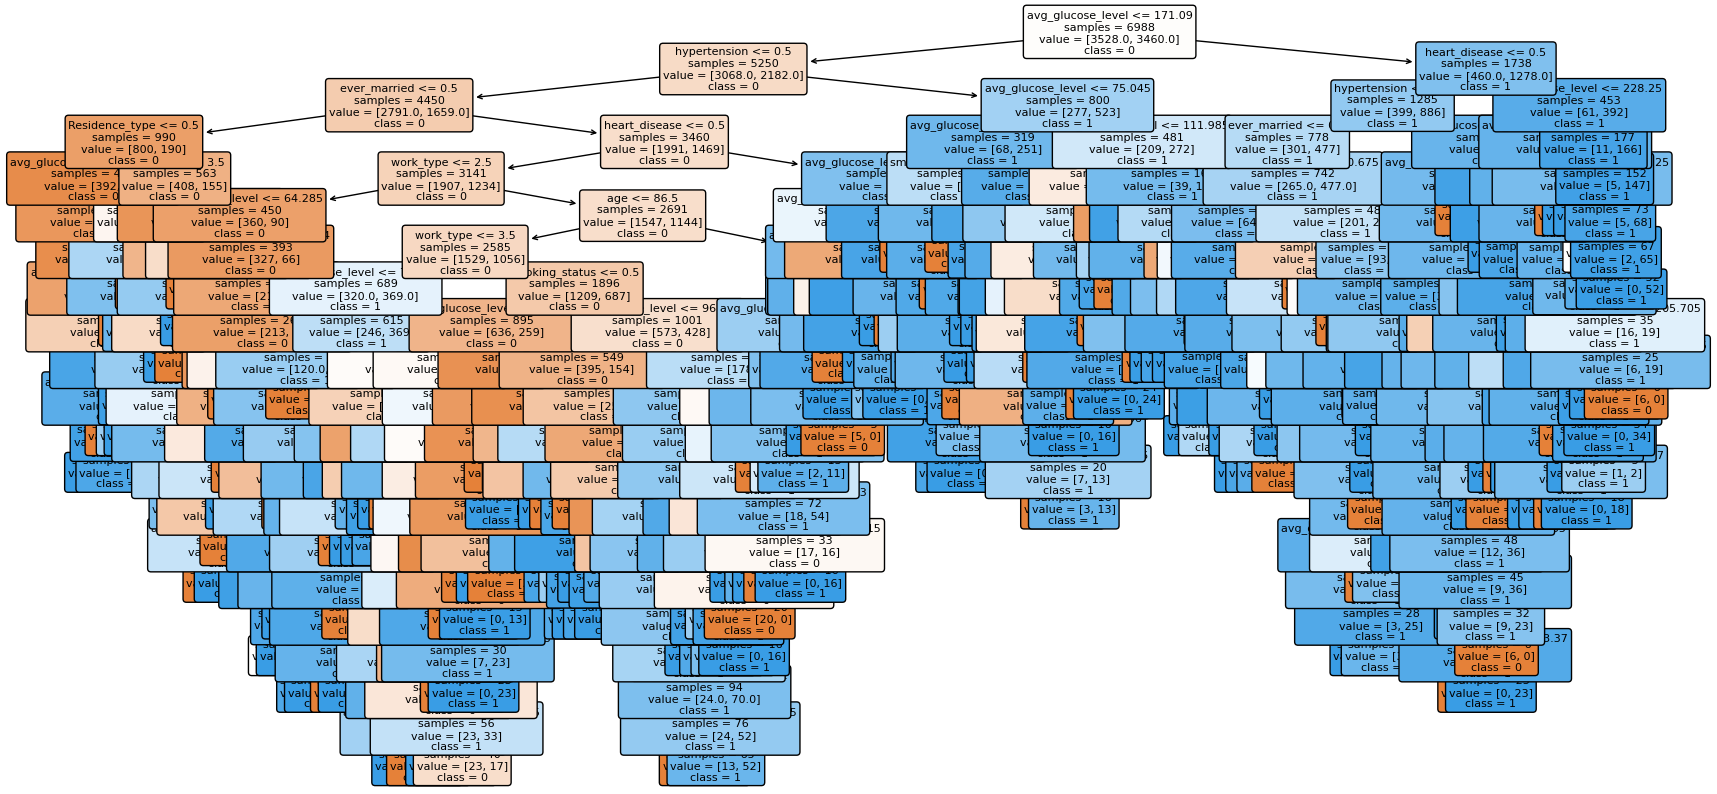

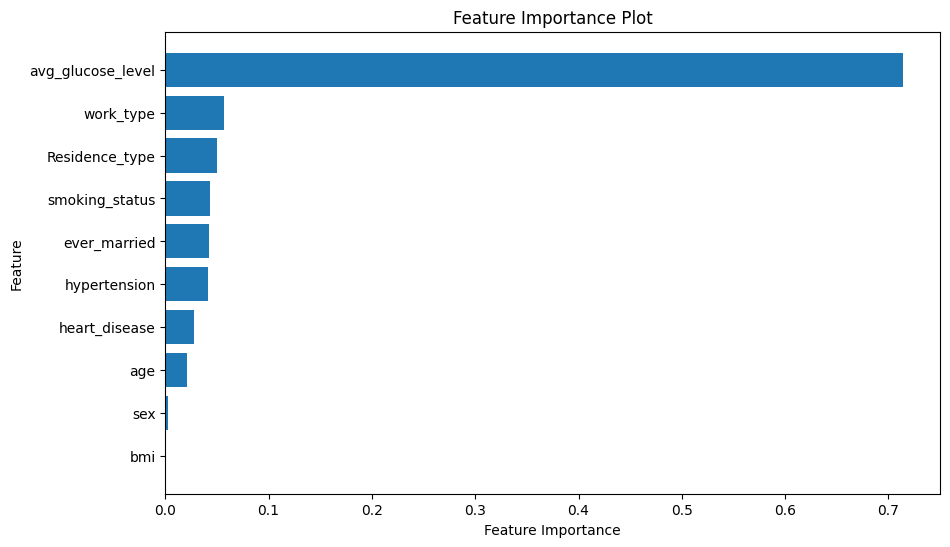

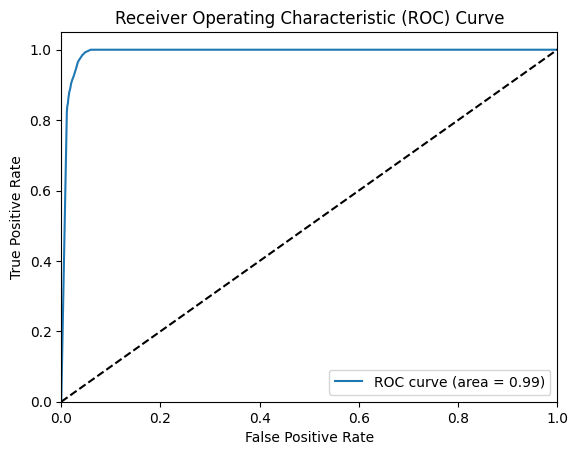

AUC Score: 0.991033974096725


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.9313304721030042, 0.9356223175965666, 0.9284692417739628, 0.9141630901287554, 0.9570815450643777, 0.9484978540772532, 0.949928469241774, 0.9313304721030042, 0.9441260744985673, 0.9326647564469914]
Mean accuracy: 0.9373214293034258
95% confidence interval: (0.9282991053137764, 0.9463437532930752)


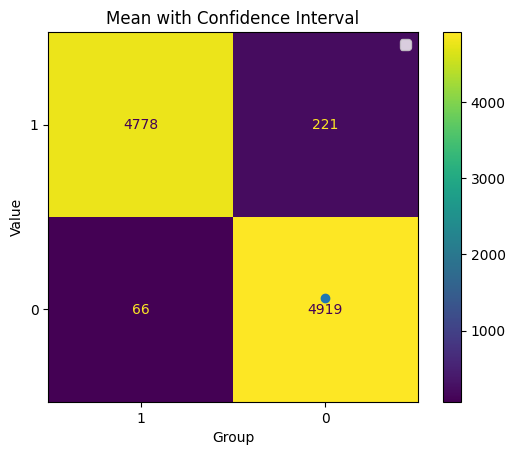

In [18]:
decision_tree = ML_algorithms.train_decision_tree_model(df_b, df_original)
ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_b)

**Hist Gradient Boosting Classifier**

Fitting 5 folds for each of 50 candidates, totalling 250 fits
search time: 40.94649600982666
Best parameters found:  {'l2_regularization': 0.2, 'learning_rate': 0.1, 'max_depth': 9, 'max_iter': 408, 'min_samples_leaf': 11}
Best score on training data:  0.9869942196531791
Classification Report on Training Set - dirty:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      3528
           1       0.98      1.00      0.99      3460

    accuracy                           0.99      6988
   macro avg       0.99      0.99      0.99      6988
weighted avg       0.99      0.99      0.99      6988

Classification Report on Test Set - dirty:
              precision    recall  f1-score   support

           0       0.99      0.92      0.95      1471
           1       0.93      0.99      0.96      1525

    accuracy                           0.96      2996
   macro avg       0.96      0.96      0.96      2996
weighted avg       0.96      0.96      

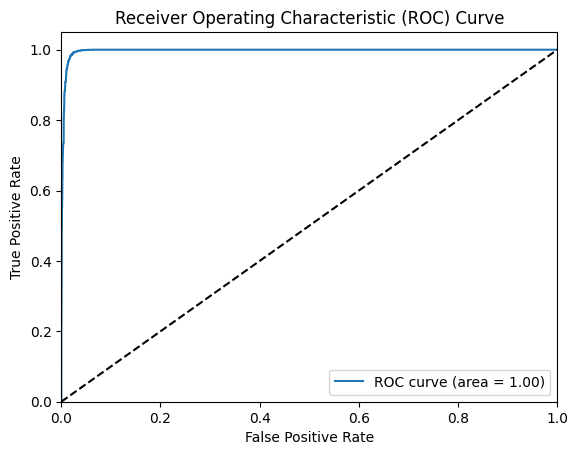

AUC Score: 0.9968715709039502


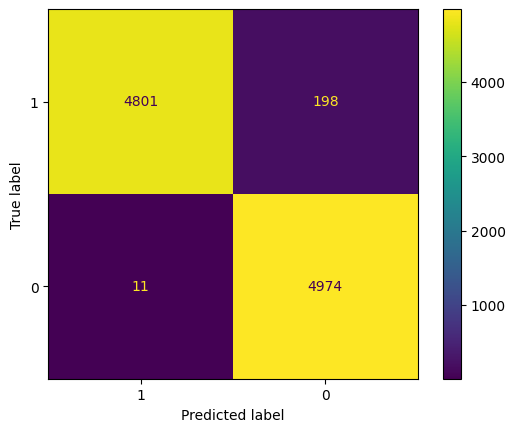

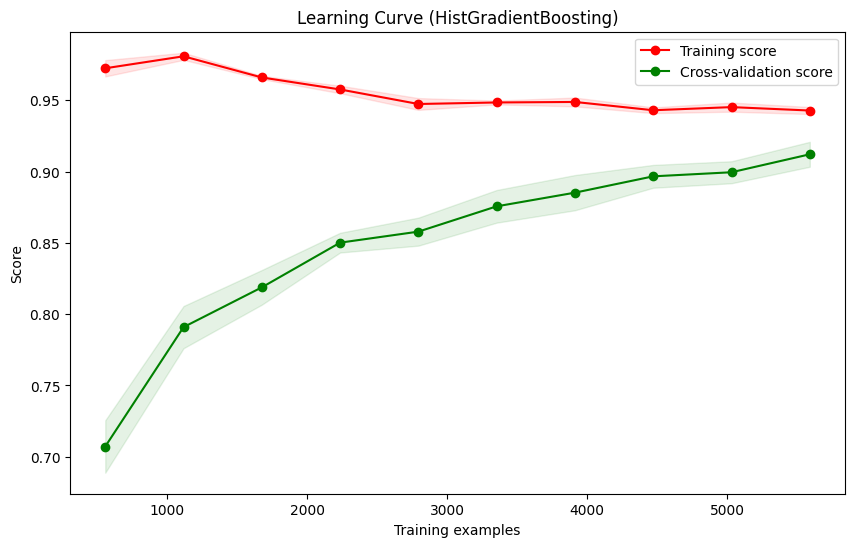

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.9570815450643777, 0.944206008583691, 0.9599427753934192, 0.9570815450643777, 0.9513590844062947, 0.9484978540772532, 0.9556509298998569, 0.9585121602288984, 0.9584527220630372, 0.9512893982808023]
Mean accuracy: 0.954207402306201
95% confidence interval: (0.9505340925410135, 0.9578807120713886)


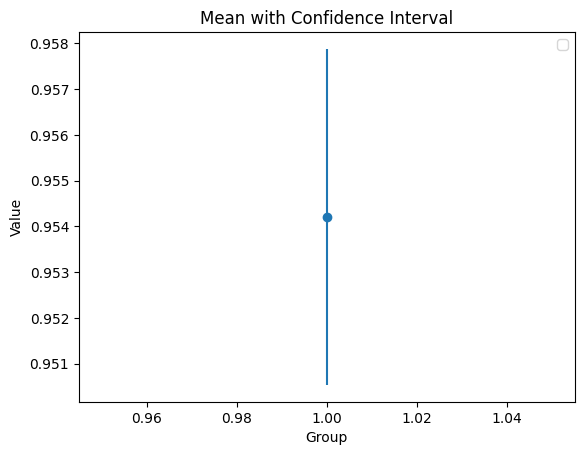

--------------------------------------


In [19]:
hgb = ML_algorithms.train_hist_gradient_boosting_model(df_b, df_original)
ML_algorithms.k_fold_cross_validation_dt(hgb,df_b)

print('--------------------------------------')